In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

In [2]:
def simple_interest(principal, average_annual_return, year):
    return principal * (1 + average_annual_return * year)

def compound_interest(principal, average_annual_return, compoundings_per_year, year):
    return principal * (1 + average_annual_return / compoundings_per_year) ** (compoundings_per_year * year)

def comparison(principal, average_annual_return, years):
    simple_interest_values = [simple_interest(principal, average_annual_return, year) for year in years]
    compound_interest_values = [compound_interest(principal, average_annual_return, 12, year) for year in years]

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Plotting on the axis object
    ax.plot(years, simple_interest_values, label='Simple Interest', zorder=1)
    ax.plot(years, compound_interest_values, label='Compound Interest', zorder=1)

    # Show starting point (principal)
    ax.scatter(0, principal, color='green', zorder=5, label='Starting Point (Principal)')

    # Show ending points
    ax.scatter(years[-1], simple_interest_values[-1], color='blue', zorder=5, label='Ending Point (Simple Interest)')
    ax.scatter(years[-1], compound_interest_values[-1], color='orange', zorder=5, label='Ending Point (Compound Interest)')

    # Annotate the final y-values on the graph
    ax.annotate(f"${simple_interest_values[-1]:,.2f}", 
                (years[-1], simple_interest_values[-1]),
                textcoords="offset points", xytext=(0,10), ha='center', zorder=10)

    ax.annotate(f"${compound_interest_values[-1]:,.2f}", 
                (years[-1], compound_interest_values[-1]),
                textcoords="offset points", xytext=(0,10), ha='center', zorder=10)
    
    # Set the y-axis label format to USD
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Solving problem with the axis name not being save correctly
    plt.tight_layout(pad=3.0)
    
    ax.set_xlabel('Years')
    ax.set_ylabel('Interest Accumulated')
    ax.set_title(f'Simple vs Compound Interest - {years[-1]} years')
    ax.legend(loc='upper left')

    return fig, simple_interest_values, compound_interest_values

In [29]:
principal = 1000
# average_annual_return = [0.025, 0.05, 0.075, 0.1]

def result_by_aar(aar):
    fig_10y, simp_10y, comp_10y  = comparison(principal, aar, range(0, 11))
    fig_25y, simp_25y, comp_25y = comparison(principal, aar, range(0, 26))
    fig_50y, simp_50y, comp_50y = comparison(principal, aar, range(0, 51))
    fig_75y, simp_75y, comp_75y = comparison(principal, aar, range(0, 76))
    fig_100y, simp_100y, comp_100y = comparison(principal, aar, range(0, 101))

    if not os.path.exists('imgs'):
        os.makedirs('imgs')
    if not os.path.exists(f'imgs/{aar}_ROI'):
        os.makedirs(f'imgs/{aar}_ROI')
        
    fig_10y.savefig(f"imgs/{aar}_ROI/fig_10y-{aar}_ROI.png")
    fig_25y.savefig(f"imgs/{aar}_ROI/fig_25y-{aar}_ROI.png")
    fig_50y.savefig(f"imgs/{aar}_ROI/fig_50y-{aar}_ROI.png")
    fig_75y.savefig(f"imgs/{aar}_ROI/fig_75y-{aar}_ROI.png")
    fig_100y.savefig(f"imgs/{aar}_ROI/fig_100y-{aar}_ROI.png")

    # Creating a dictionary with the data
    data = {
        'Interest Type': ['10 Years', '25 Years', '50 Years', '75 Years', '100 Years'],
        'Simple - End ($)': [simp_10y[-1], simp_25y[-1], simp_50y[-1], simp_75y[-1], simp_100y[-1]],
        'Compound - End ($)': [comp_10y[-1], comp_25y[-1], comp_50y[-1], comp_75y[-1], comp_100y[-1]],
    }
    
    df = pd.DataFrame(data)
    
    # Calculating the delta and adding it to the DataFrame
    df['Delta (USD)'] = df['Compound - End ($)'] - df['Simple - End ($)']
    df['Delta (%)'] = ((df['Compound - End ($)'] / df['Simple - End ($)'])-1) * 100
    
    # setting .2f
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
    pd.set_option('display.width', None)        # Use the necessary width to display all columns
    
    print(df)

  Interest Type  Simple - End ($)  Compound - End ($)  Delta (USD)  Delta (%)
0      10 Years           1250.00             1283.69        33.69       2.70
1      25 Years           1625.00             1867.03       242.03      14.89
2      50 Years           2250.00             3485.81      1235.81      54.92
3      75 Years           2875.00             6508.11      3633.11     126.37
4     100 Years           3500.00            12150.85      8650.85     247.17


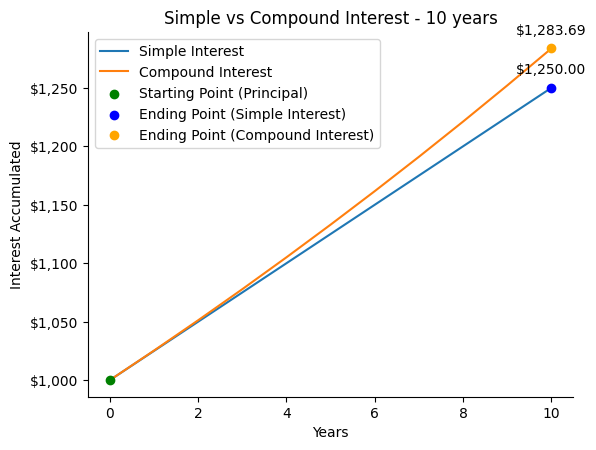

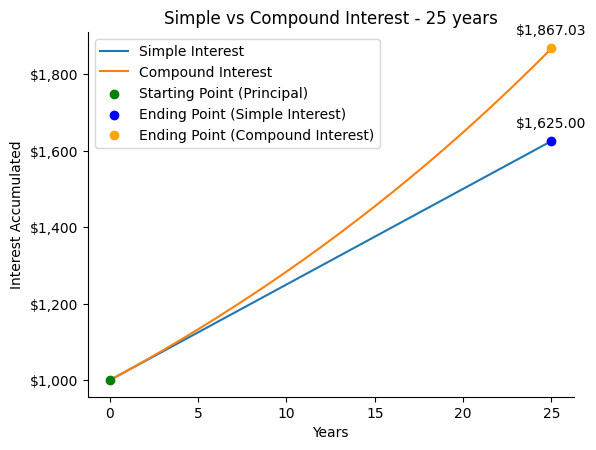

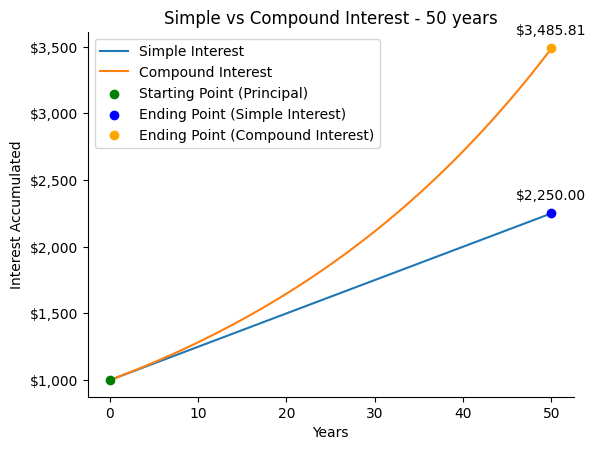

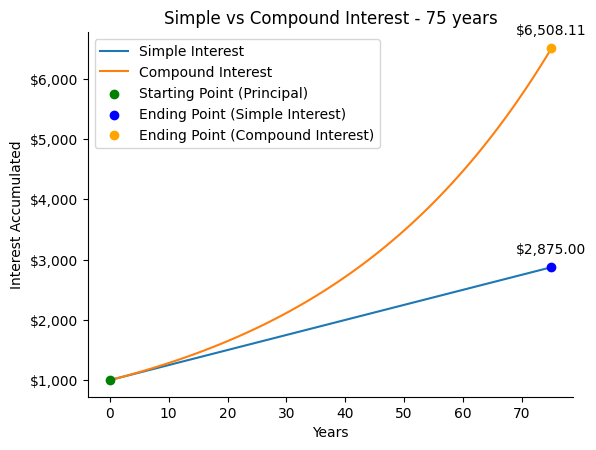

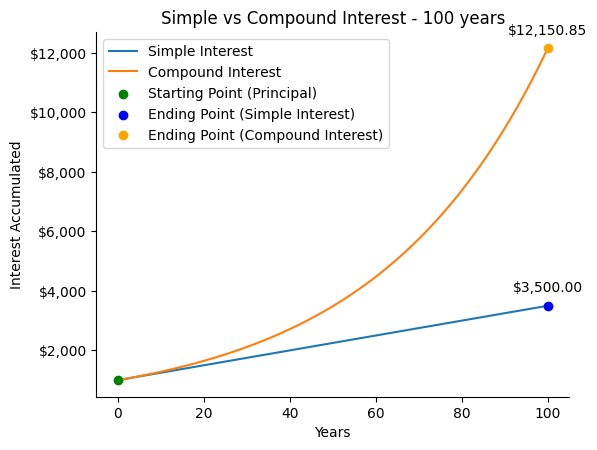

In [30]:
result_by_aar(0.025)

  Interest Type  Simple - End ($)  Compound - End ($)  Delta (USD)  Delta (%)
0      10 Years           1500.00             1647.01       147.01       9.80
1      25 Years           2250.00             3481.29      1231.29      54.72
2      50 Years           3500.00            12119.38      8619.38     246.27
3      75 Years           4750.00            42191.09     37441.09     788.23
4     100 Years           6000.00           146879.45    140879.45    2347.99


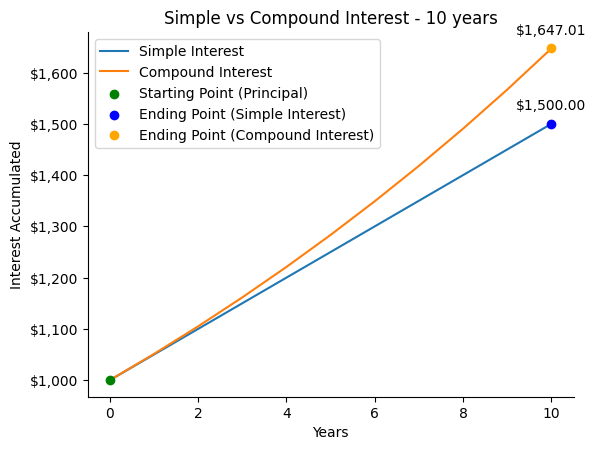

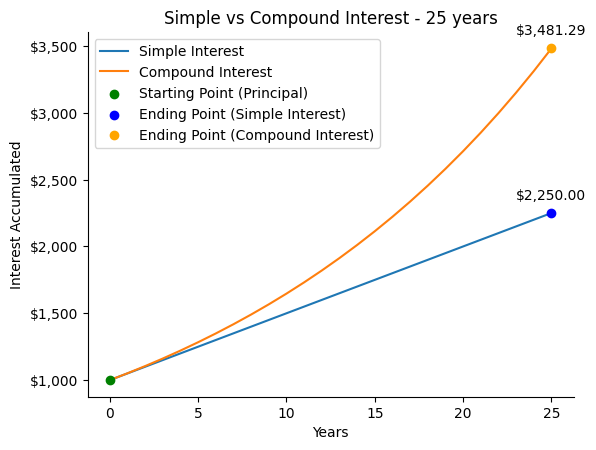

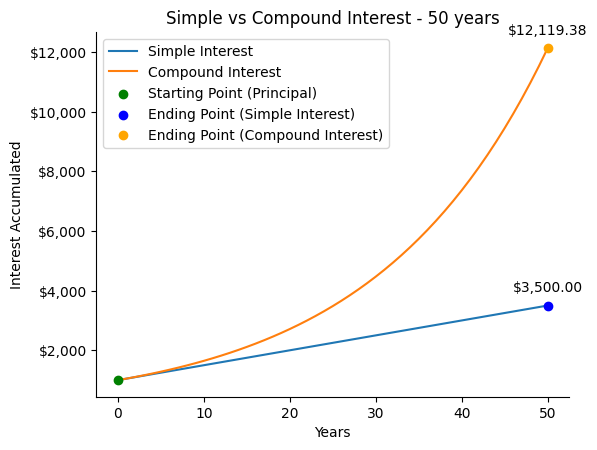

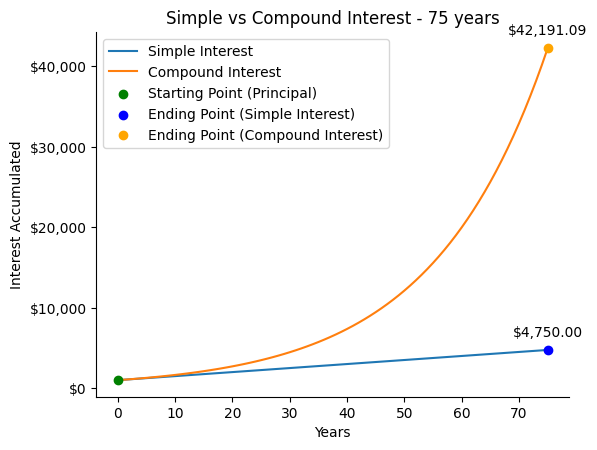

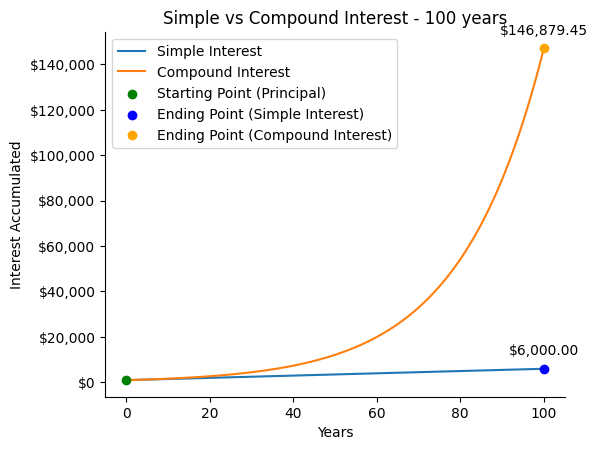

In [14]:
result_by_aar(0.05)

  Interest Type  Simple - End ($)  Compound - End ($)  Delta (USD)  Delta (%)
0      10 Years           1750.00             2112.06       362.06      20.69
1      25 Years           2875.00             6482.88      3607.88     125.49
2      50 Years           4750.00            42027.74     37277.74     784.79
3      75 Years           6625.00           272460.81    265835.81    4012.62
4     100 Years           8500.00          1766330.84   1757830.84   20680.36


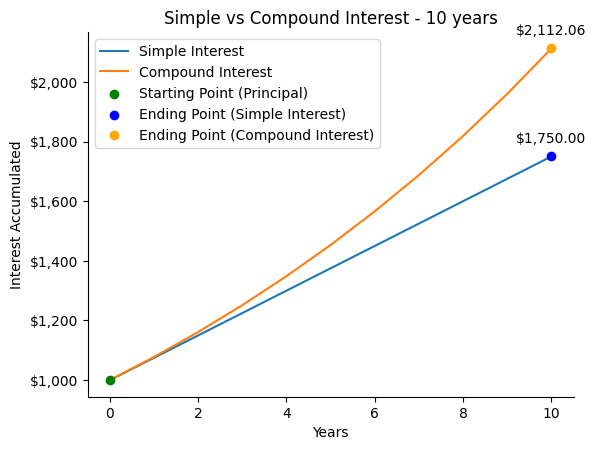

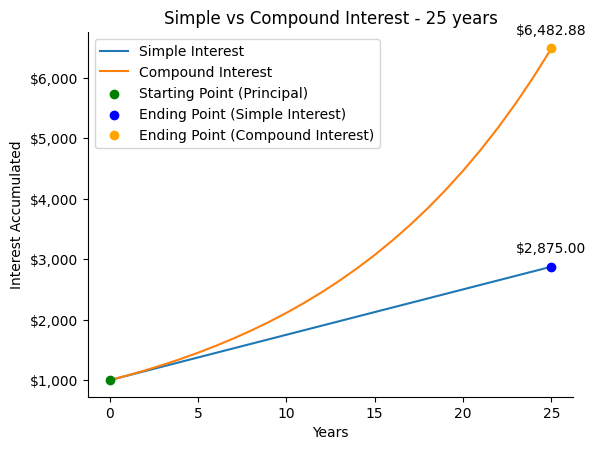

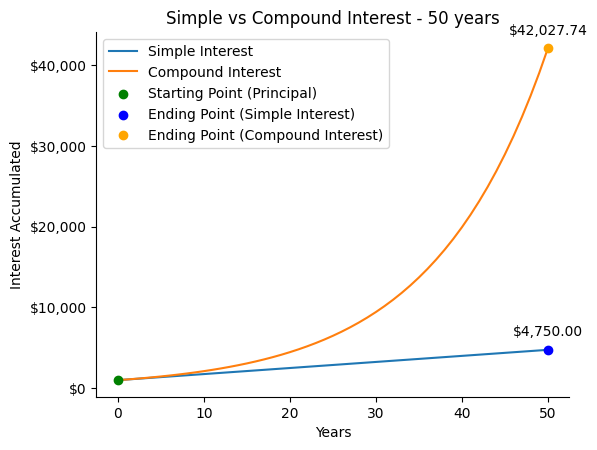

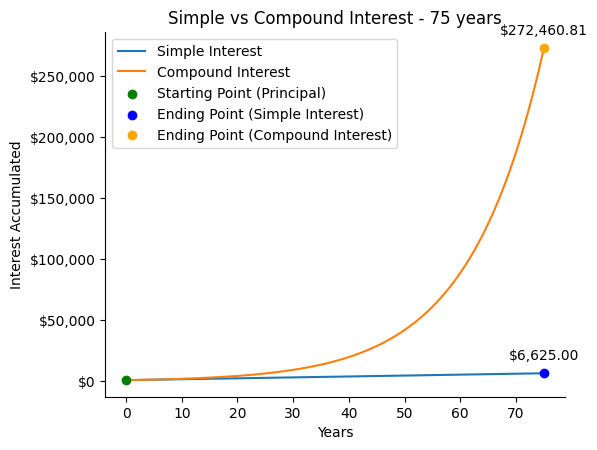

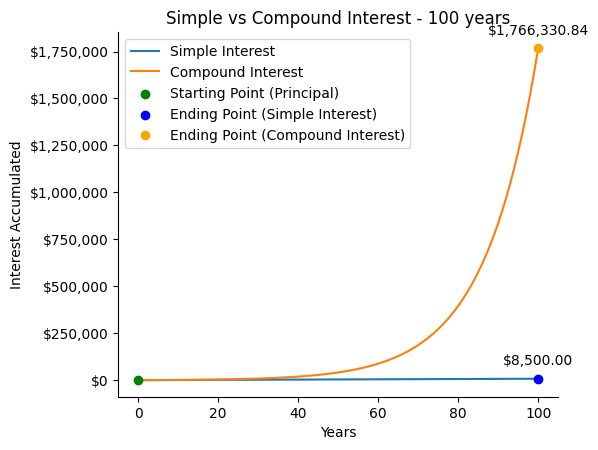

In [15]:
result_by_aar(0.075)

  Interest Type  Simple - End ($)  Compound - End ($)  Delta (USD)  Delta (%)
0      10 Years           2000.00             2707.04       707.04      35.35
1      25 Years           3500.00            12056.95      8556.95     244.48
2      50 Years           6000.00           145369.92    139369.92    2322.83
3      75 Years           8500.00          1752717.17   1744217.17   20520.20
4     100 Years          11000.00         21132414.60  21121414.60  192012.86


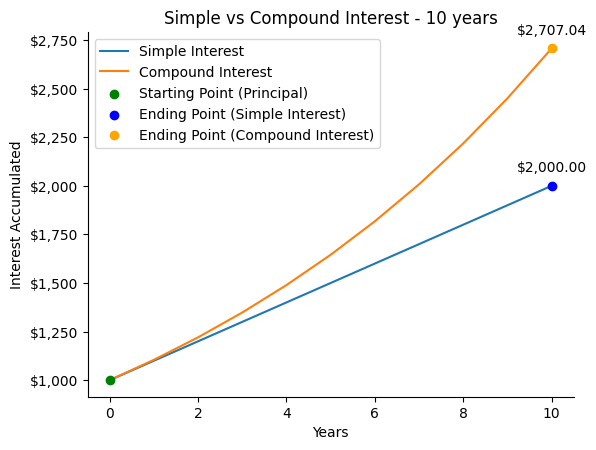

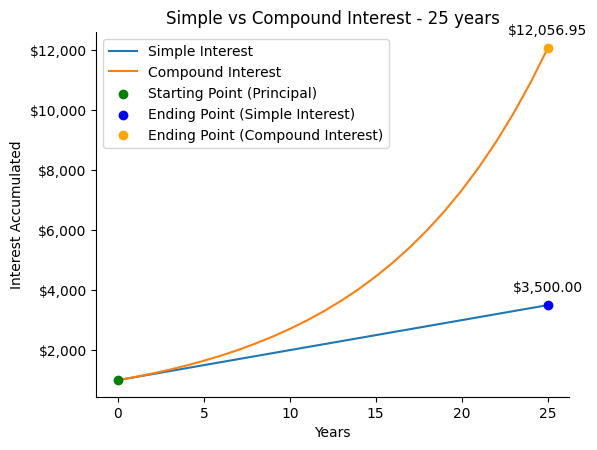

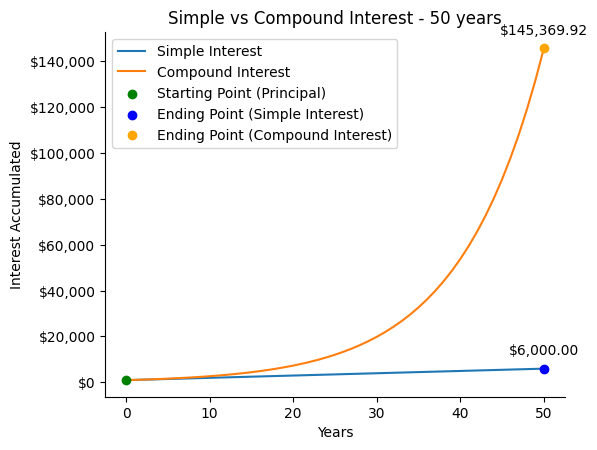

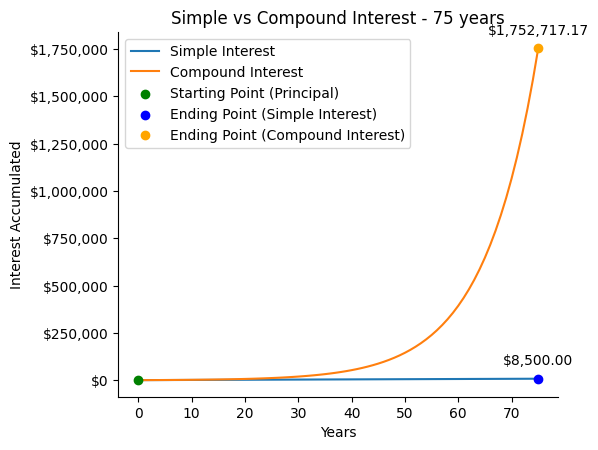

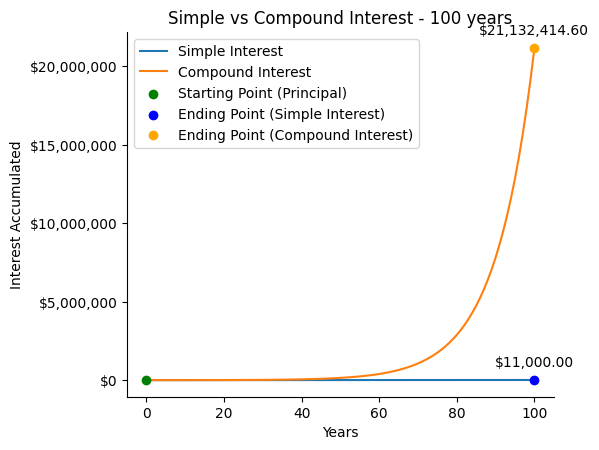

In [16]:
result_by_aar(0.1)